In [1]:
from eval_functions import get_all_metrics, pretty_print_metrics, plot_confusion_matrix

from datasets import load_dataset
from tqdm import tqdm
from transformers import pipeline

First model is from these guys, https://github.com/ProsusAI/finBERT, based on this paper, https://arxiv.org/abs/1908.10063.

Fine-tuning is done on this financial sentiment analysis dataset, https://arxiv.org/pdf/1307.5336.pdf

Second and third models are from a Snapchat ML person, who took two multilingual transfomrers and I presume followed a similar or the same pre-training and fine-tuning as the above paper. Thought I would just include it so you can try them as well, and as they're multilingual could be interesting for you; also you could possibly train some simple downstream classifier that takes as an input the output of all three of these models and then make a final decision (ensemble approach)

In [2]:
possible_models = ["ProsusAI/finbert",
                   "sismetanin/xlm_roberta_large-financial_phrasebank",
                   "sismetanin/mbart_large-financial_phrasebank"]

In [3]:
sa_pipeline = pipeline("sentiment-analysis", model=possible_models[0], tokenizer=possible_models[0])

In [4]:
possible_agreement_options = ['sentences_allagree', 'sentences_75agree', 'sentences_66agree', 'sentences_50agree']

In [5]:
financial_phrasebank = load_dataset("financial_phrasebank", possible_agreement_options[2])

Reusing dataset financial_phrasebank (/Users/rahulkhanna/.cache/huggingface/datasets/financial_phrasebank/sentences_66agree/1.0.0/a6d468761d4e0c8ae215c77367e1092bead39deb08fbf4bffd7c0a6991febbf0)


In [6]:
# negative - label 0
# neutral - label 1
# positive - label 2
true_labels = []
predicted_labels = []

for dic in tqdm(financial_phrasebank["train"]):
    true_labels.append(dic["label"])
    result = sa_pipeline(dic["sentence"])[0]
    if result["label"] == "negative":
        predicted_labels.append(0)
    if result["label"] == "neutral":
        predicted_labels.append(1)
    if result["label"] == "positive":
        predicted_labels.append(2)

100%|████████████████████████████████████| 4217/4217 [07:51<00:00,  8.95it/s]


In [7]:
metrics = get_all_metrics(true_labels, predicted_labels)

As there is no official train/dev/test split for the Financial Phrasebank these numbers are to be taken with a pinch of salt, as its very likely the machine was trained on the exact same instance its now being asked to predict on. 

In [8]:
print(pretty_print_metrics(metrics))

1

accuracy: 0.918

precision: 
	all: ['0.817', '0.977', '0.861']
	micro: 0.918
	macro: 0.885
	weighted: 0.925
	
recall: 
	all: ['0.979', '0.896', '0.940']
	micro: 0.918
	macro: 0.938
	weighted: 0.918
	
f1_measure: 
	all: ['0.890', '0.935', '0.899']
	micro: 0.918
	macro: 0.908
	weighted: 0.919
	
support: 
	y_true_dist: ['0.122', '0.601', '0.277']
	y_true_count: 4217.000
	y_predicted_dist: ['0.146', '0.551', '0.303']
	y_predicted_count: 4217.000
	



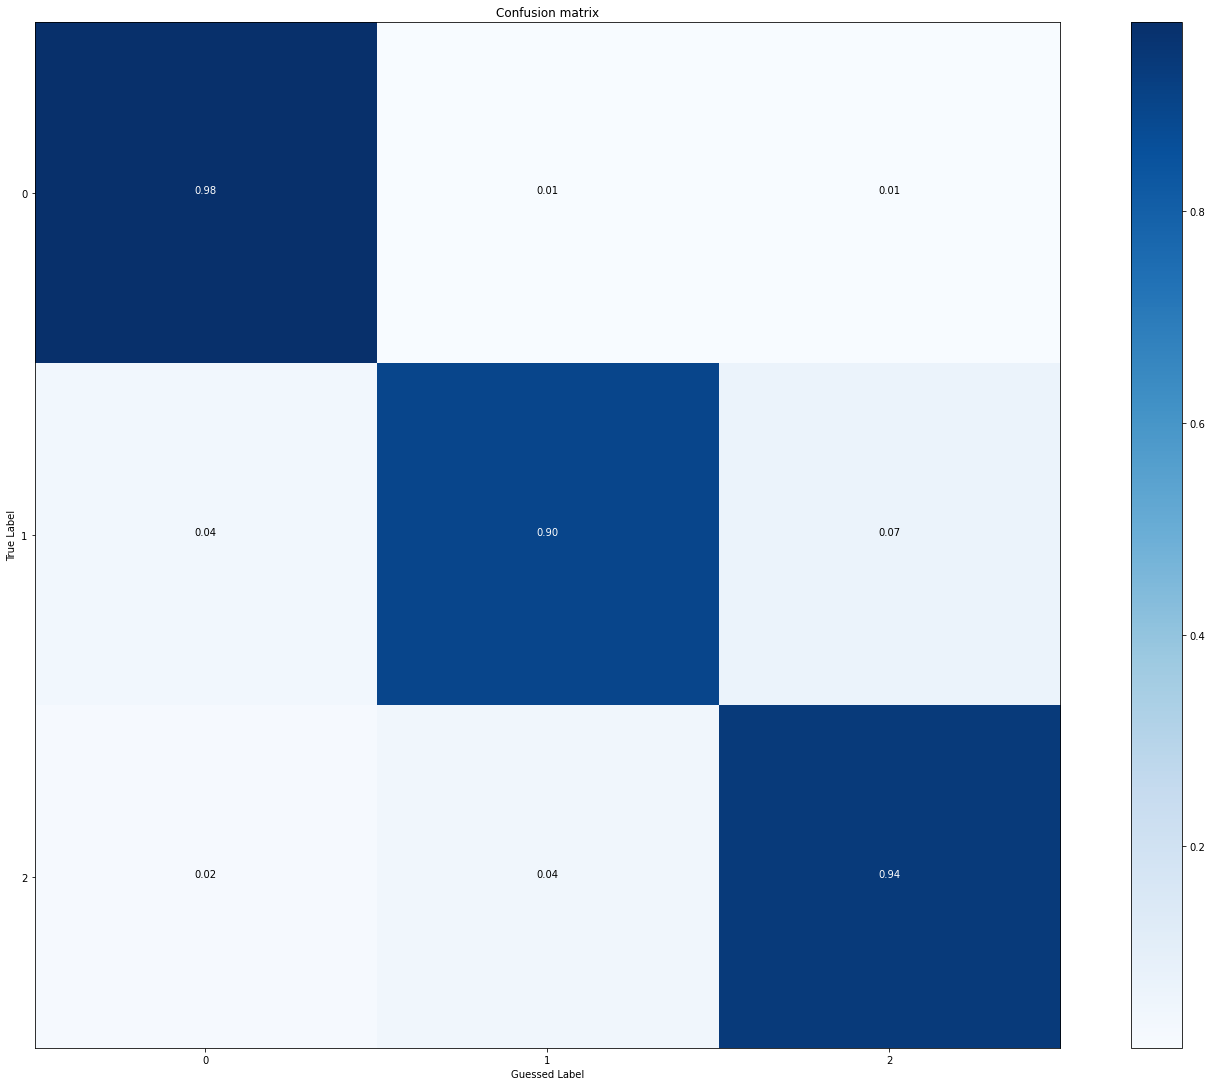

In [9]:
plot_confusion_matrix(metrics["confusion_matrix"])